Preprocessed_ObesityDataSet.csv
1. Load Data
2. Data Exploration
3. Data Preprocessing
4. Feature Selection
5. Model Selection
6. Model Implementation

1. Load Data

In [57]:
# 0.
import pandas as pd

dataDF = pd.read_csv('Preprocessed_ObesityDataSet.csv')
dataDF.drop('BMI', inplace=True, axis=1)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [58]:
# 2. Preprocessing
# 2-1. 결측치, 중복값, 이상치
# 1) 결측치는 없음
# 2) 중복값 확인
print(dataDF.duplicated().sum())   # 27
# 3) 키, 몸무게 보정 : 반올림
# print(dataDF['Height'])
dataDF['Height'] = dataDF['Height'].round(3)
# print(dataDF['Height'])
# print(dataDF['Weight'])
dataDF['Weight'] = dataDF['Weight'].round(1)
# print(dataDF['Weight'])
print(dataDF.duplicated().sum())    # 27
# 4) 중복값 제거
dataDF.drop_duplicates(inplace=True)
dataDF.duplicated().sum()   # 0

27
47


0

In [59]:
dataDF.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
2106,0,21,1.711,131.4,0,1,3,3,2,0,...,0,2,1,2,0,0,0,1,0,6
2107,0,22,1.749,133.7,0,1,3,3,2,0,...,0,1,1,2,0,0,0,1,0,6
2108,0,23,1.752,133.7,0,1,3,3,2,0,...,0,1,1,2,0,0,0,1,0,6
2109,0,24,1.739,133.3,0,1,3,3,2,0,...,0,1,1,2,0,0,0,1,0,6
2110,0,24,1.739,133.5,0,1,3,3,2,0,...,0,1,1,2,0,0,0,1,0,6


Target : BMI; Regression
- 비만율을 알아보기 위해 BMI지수를 계산하고, 
- NObeyesdad 컬럼과 0.95 이상의 높은 상관 관계를 보여 
- 비만도를 나타낼 수 있는 컬럼이라고 판단, 회귀 분석의 타깃으로 설정

In [64]:
#  2-2. BMI 컬럼 추가
dataDF['BMI'] = dataDF['Weight'] / ((dataDF['Height']) ** 2)
dataDF.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,BMI
0,0,21,1.62,64.0,0,0,2,3,2,0,...,0,1,3,0,0,0,1,0,1,24.386526
1,0,21,1.52,56.0,0,0,3,3,2,1,...,3,0,2,0,0,0,1,0,1,24.238227
2,1,23,1.80,77.0,0,0,2,3,2,0,...,2,1,1,0,0,0,1,0,1,23.765432


C:\Users\wjs31\AppData\Local\Temp\ipykernel_34468\2707690287.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))


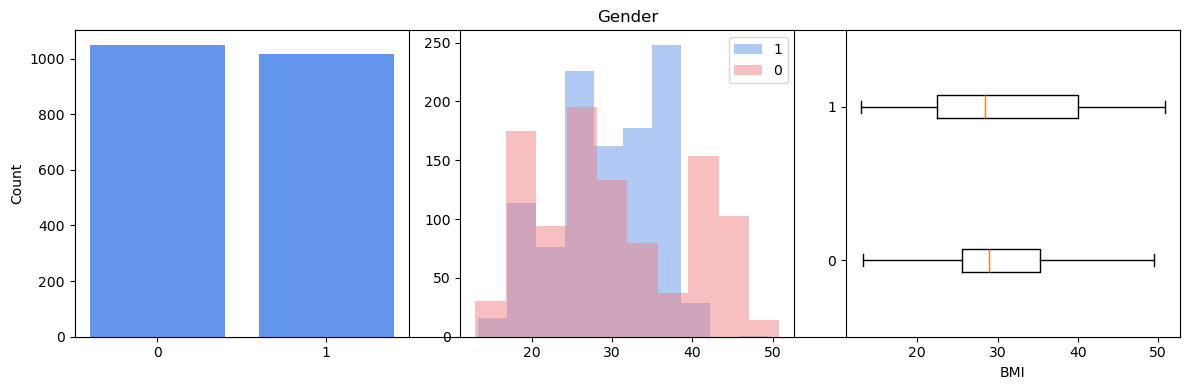

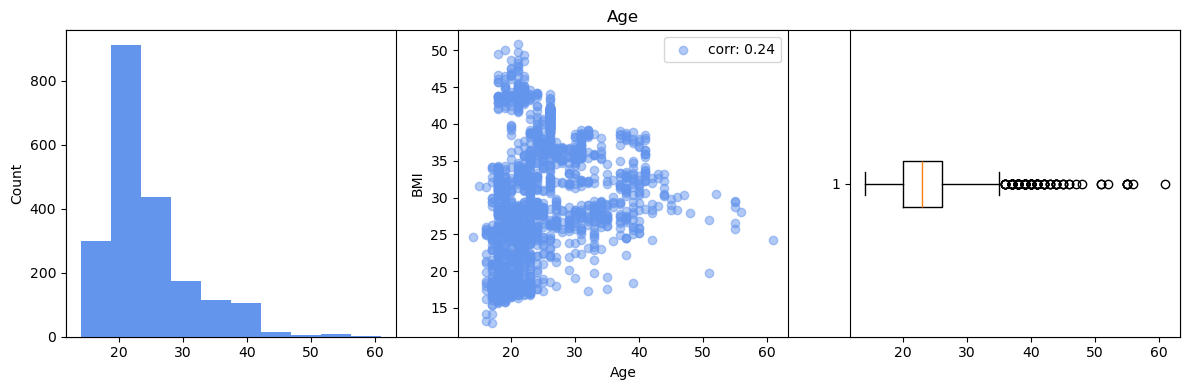

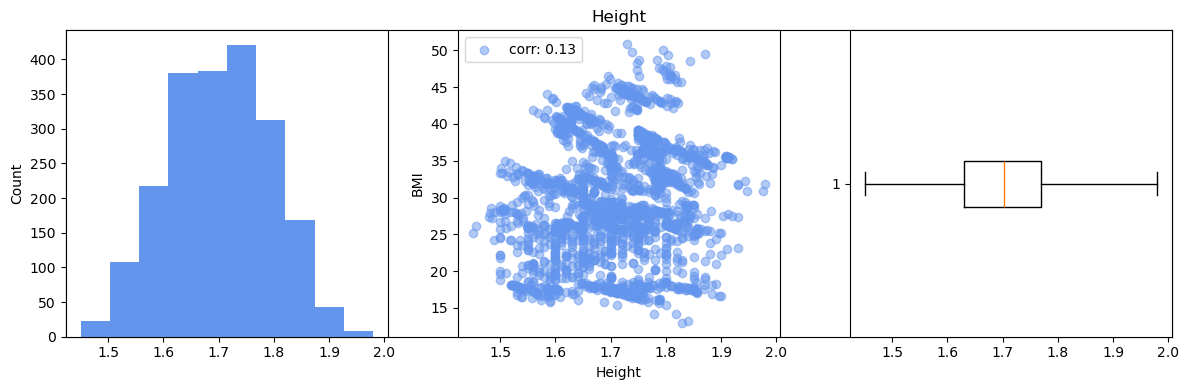

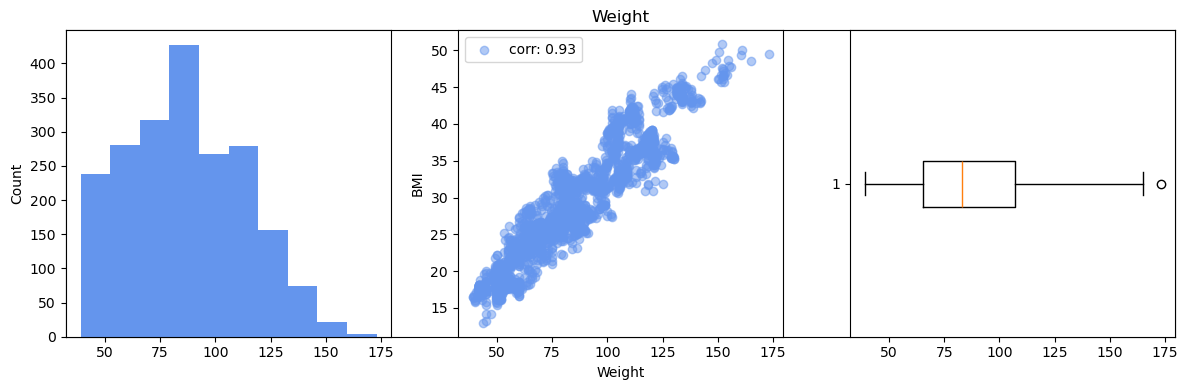

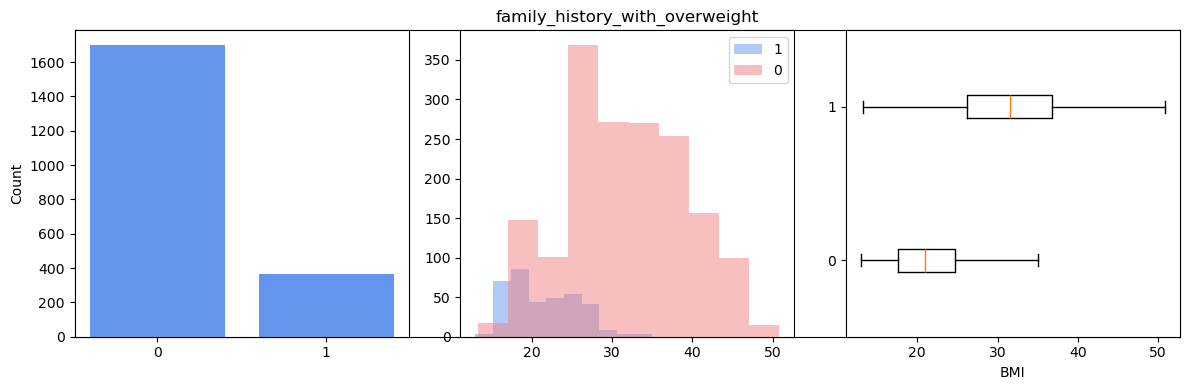

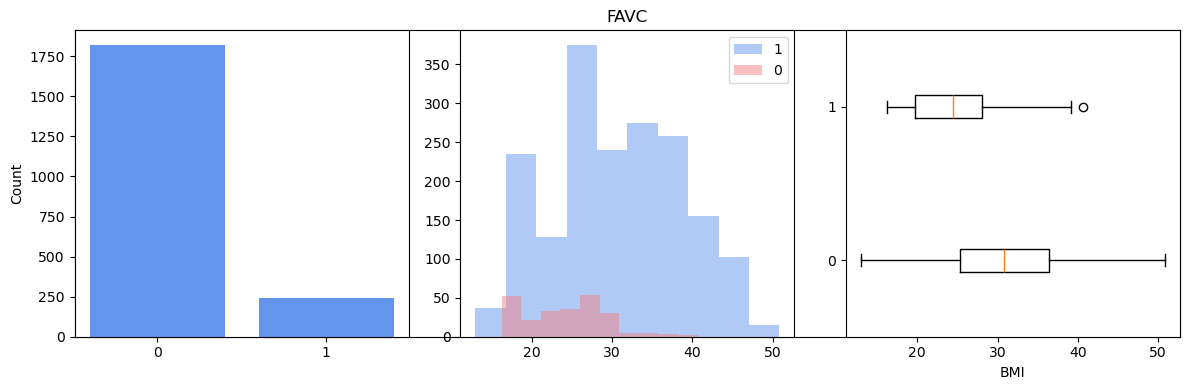

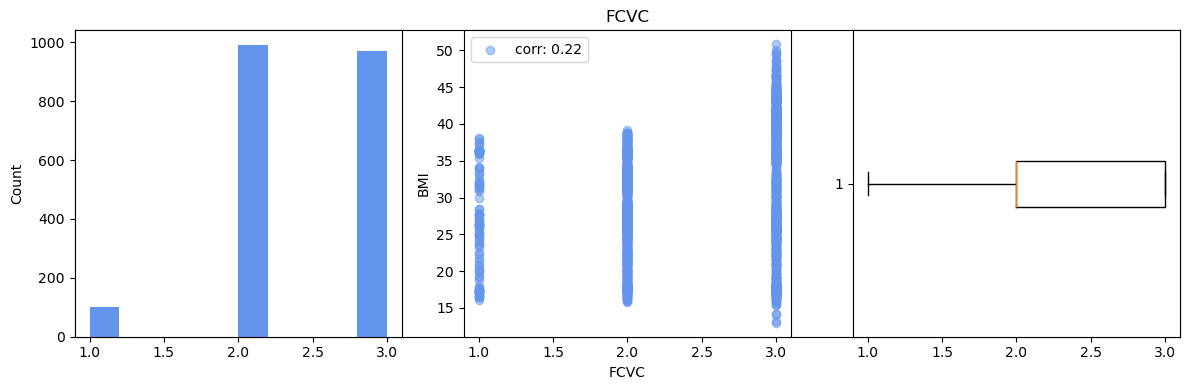

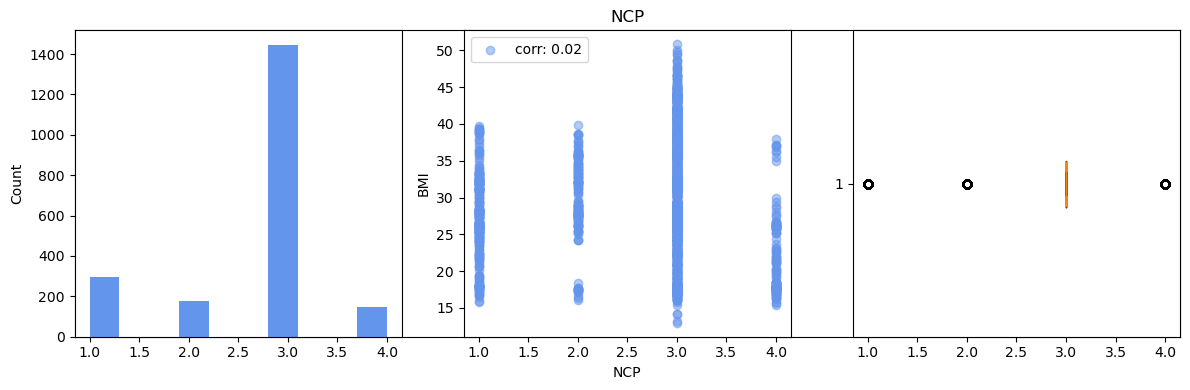

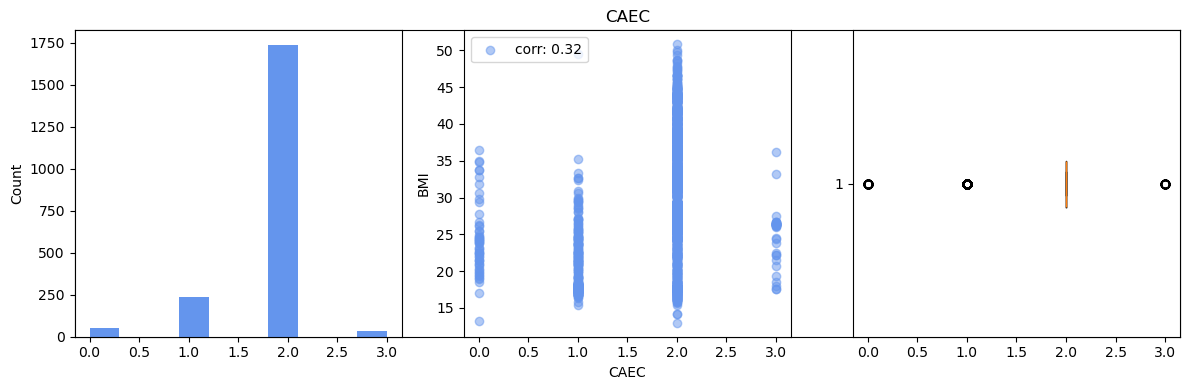

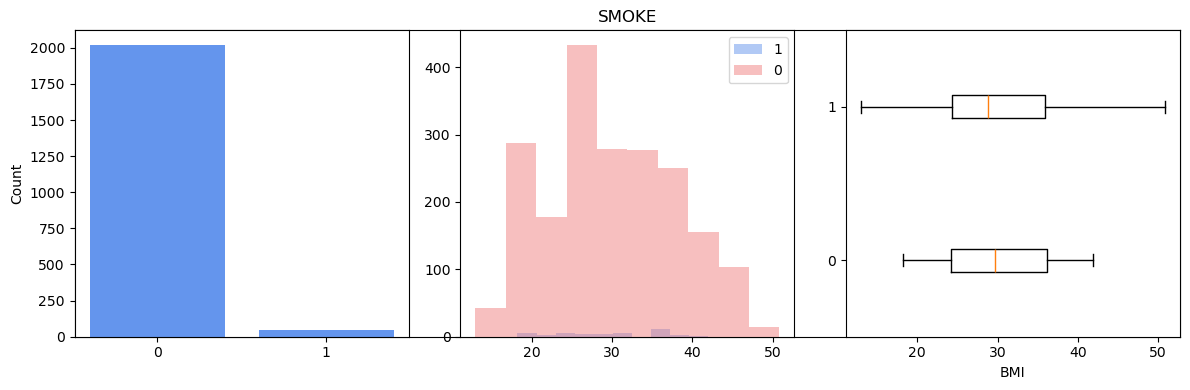

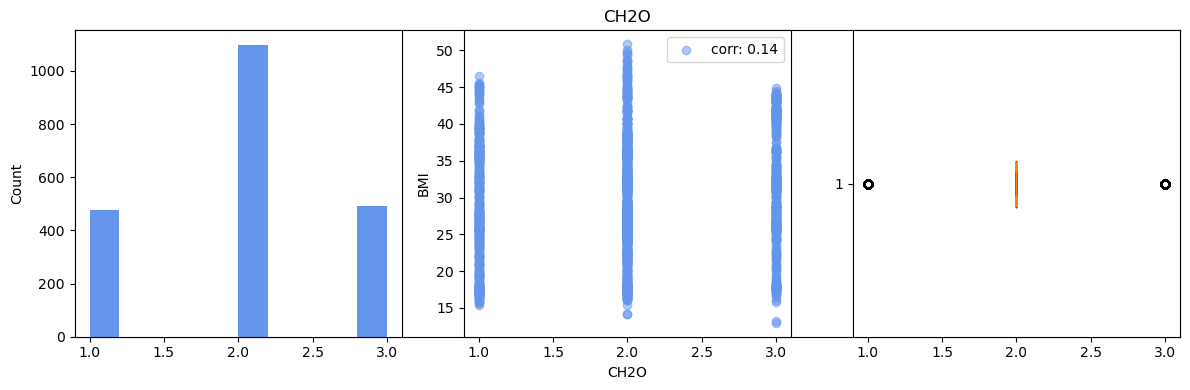

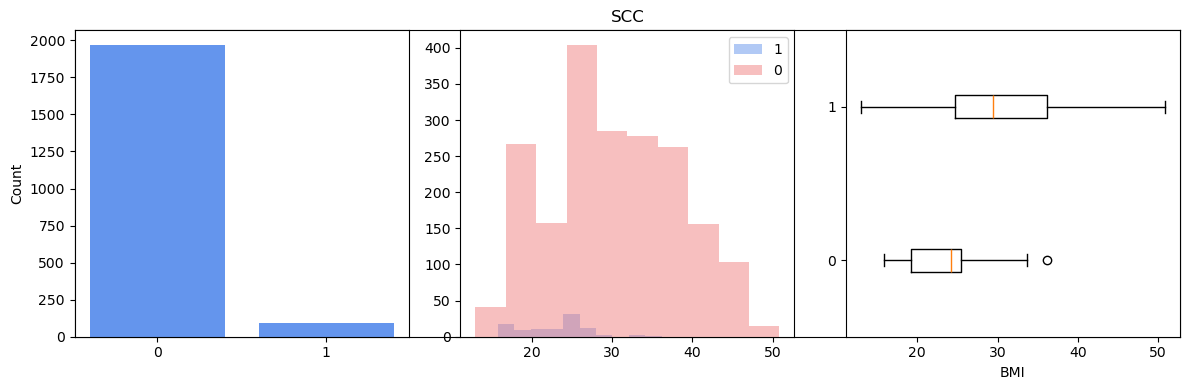

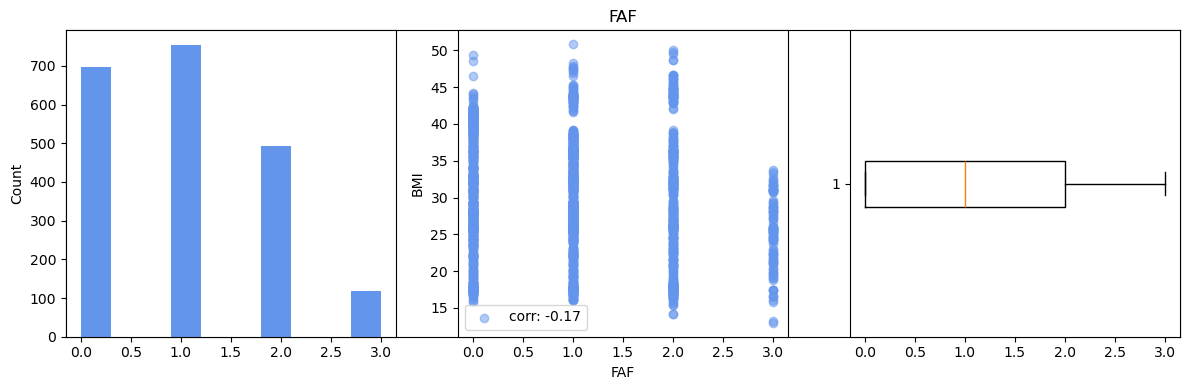

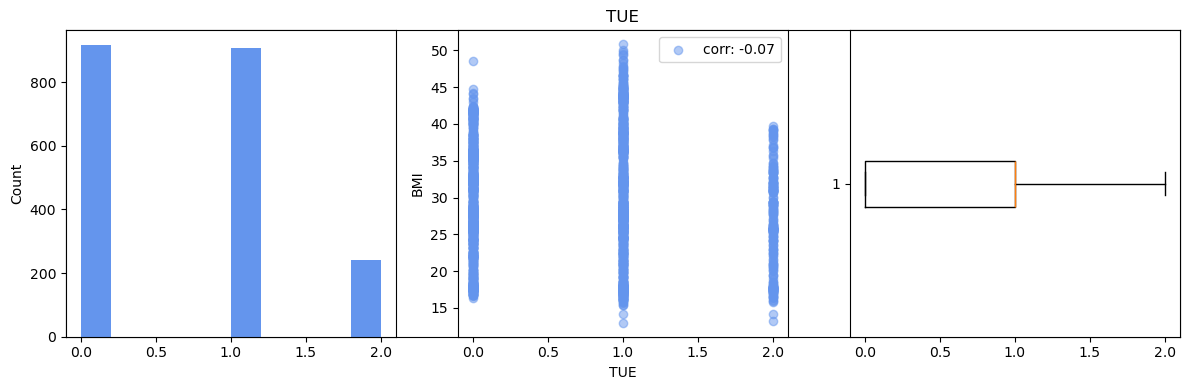

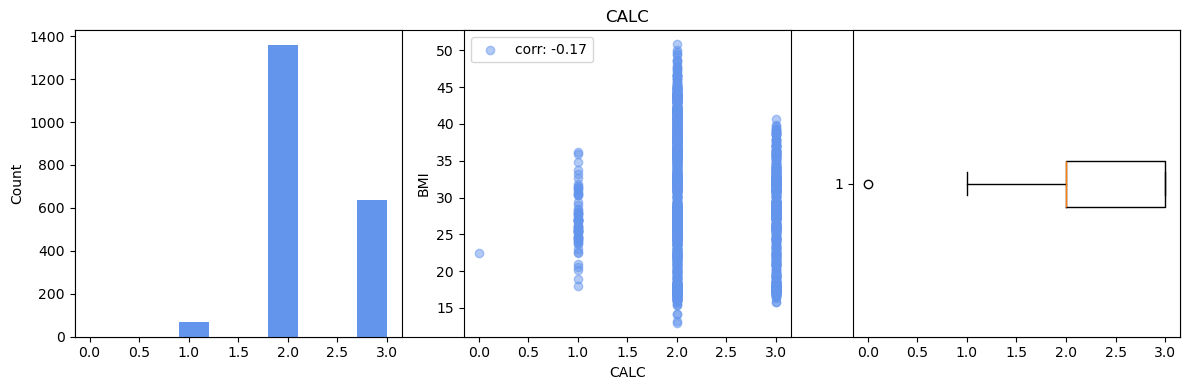

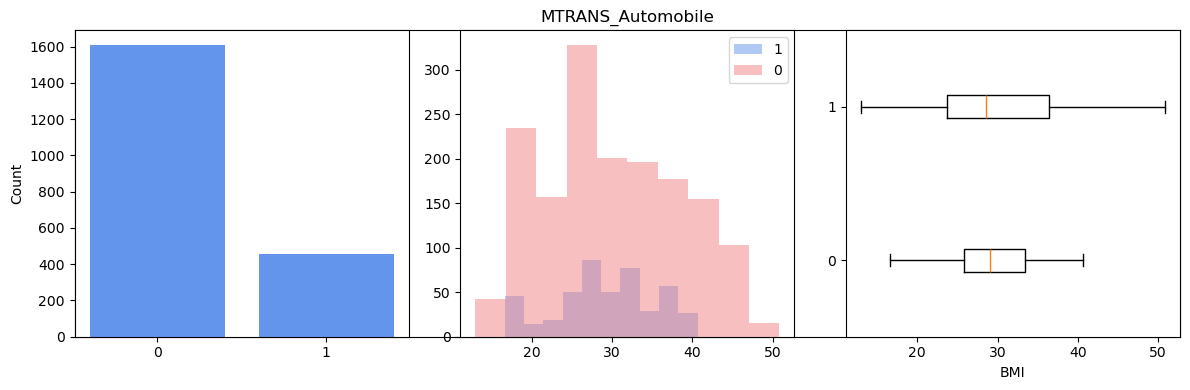

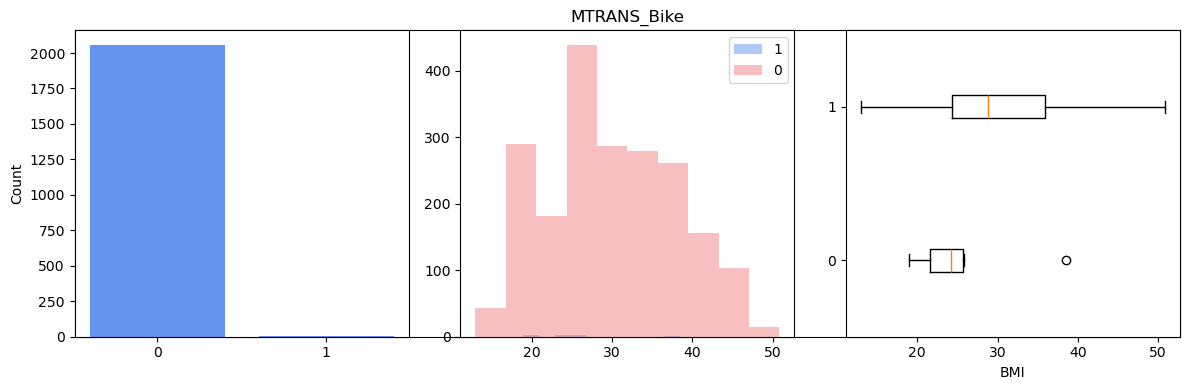

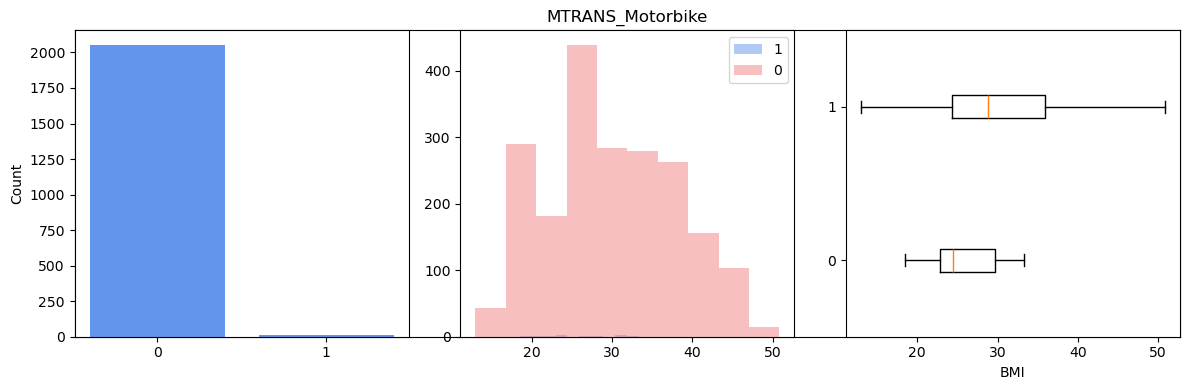

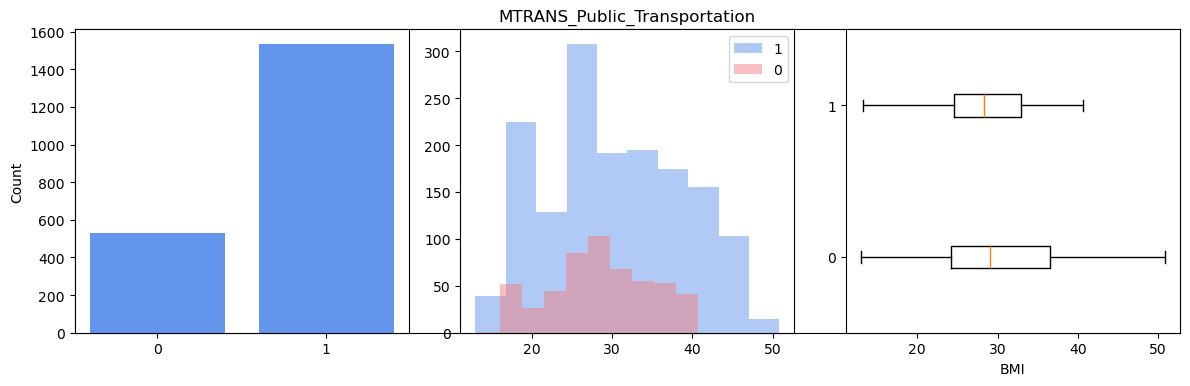

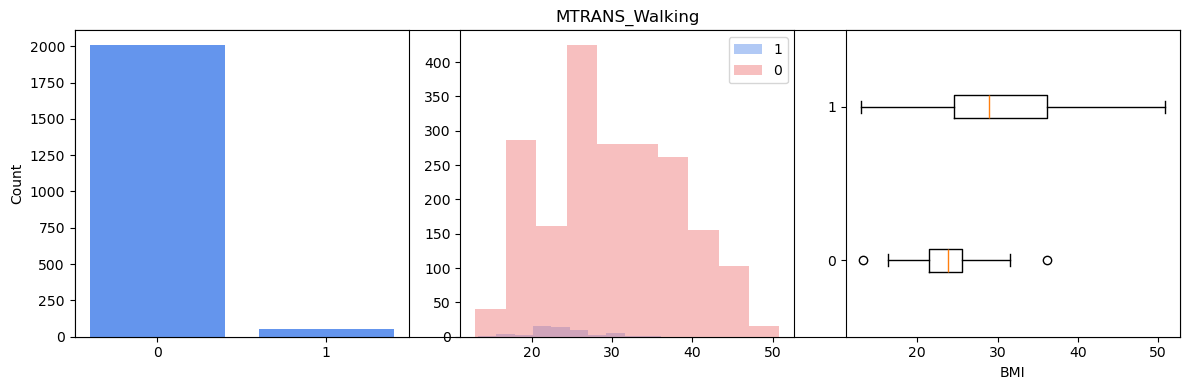

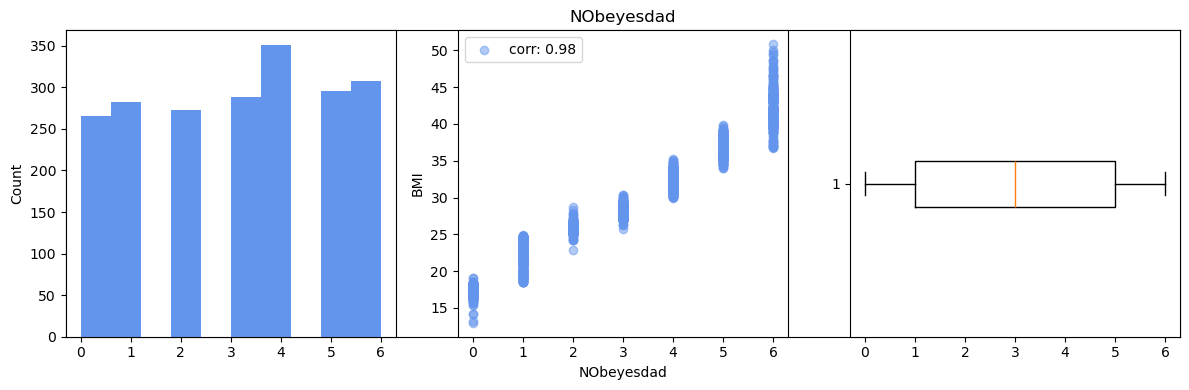

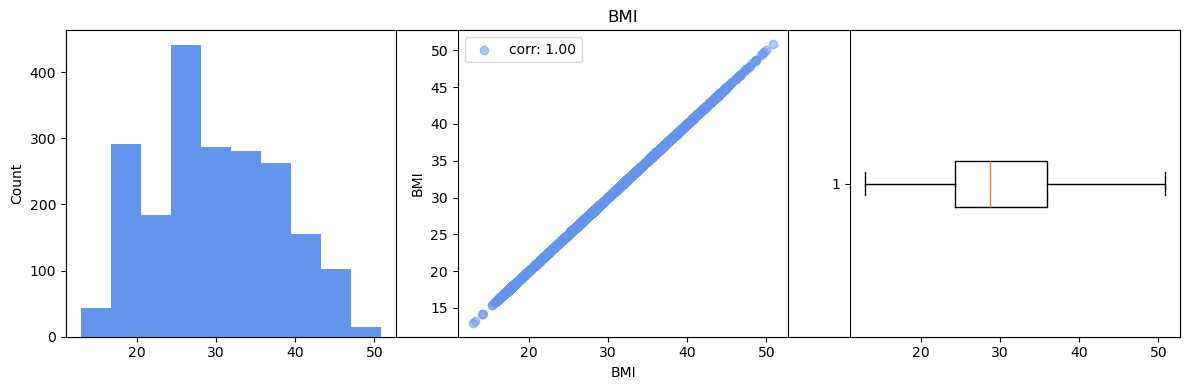

In [74]:
# 2) 이상치 확인 : histogram, scatter, boxplot
# - 
from matplotlib import pyplot as plt

COLOR = '#6495ED'
COLOR2 = '#F08080'
# columns which value count is more than 2
over2_cols = dataDF.loc[:, dataDF.nunique() > 2].columns
binary_cols = dataDF.loc[:, dataDF.nunique() == 2].columns

# 값이 2가지 일때
for col in dataDF.columns:
    if col in binary_cols:
        plt.figure(figsize=(12, 4))
        plt.title(col)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(1, 3, 1)
        plt.bar(dataDF[col].unique(), dataDF[col].value_counts(), color=COLOR)
        plt.xticks([0, 1])
        plt.ylabel('Count')
        plt.subplot(1, 3, 2)
        plt.hist(dataDF[dataDF[col] == 1].BMI, color=COLOR, alpha=0.5, label='1')
        plt.hist(dataDF[dataDF[col] == 0].BMI, color=COLOR2, alpha=0.5, label='0')
        plt.legend()
        plt.subplot(1, 3, 3)    # boxplot
        # dataDF[col] == 1 일때와 0 일때
        plt.boxplot(dataDF[dataDF[col] == 1].BMI, labels=[0], vert=False, positions=[1])
        plt.boxplot(dataDF[dataDF[col] == 0].BMI, labels=[1], vert=False, positions=[2])
        plt.xlabel('BMI')
              
        plt.tight_layout()
    

    # 값이 2가지 이상
    if col in over2_cols:
        plt.figure(figsize=(12, 4))
        plt.title(col)
        plt.xticks([])
        plt.yticks([])
        plt.subplot(1, 3, 1)
        plt.hist(dataDF[col], color=COLOR)
        plt.ylabel('Count')
        plt.subplot(1, 3, 2)
        corr = dataDF['BMI'].corr(dataDF[col])
        plt.scatter(dataDF[col], dataDF['BMI'], color=COLOR, alpha=0.5, label = f'corr: {corr:.2f}')
        plt.legend()
        plt.xlabel(col)
        plt.ylabel('BMI')
        plt.subplot(1, 3, 3)
        plt.boxplot(dataDF[col], vert=False)
        plt.tight_layout()
plt.show()
# TODO 다음부턴 fig, ax 로 만들기


In [ ]:
# 값의 종류가 매우 적을 때 한 값에 치중된다면 그 비율은 신뢰할 수 있을까?
# - 우선 비율을 따져보기


In [75]:
# 파일 저장하기 obesity.csv
dataDF.to_csv('obesity.csv', index=False)